# Types of Regression & Classification
1. Ridge Regression
2. Lasso Regression
3. ElasticNet Regression
4. Logistic Regression


# Lasso, Ridge and ElasticNet Regression

## import libs

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
sb.set(style='whitegrid')

### import dataset

In [91]:
# from google.colab import files
# uploaded = files.upload()
# D7data1.csv
# Boston Housing Dataset

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [92]:
dataset = pd.read_csv('D7data1.csv')
# Boston Housing Dataset
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [93]:
dataset.shape

(506, 14)

In [94]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### EDA

#### null check

In [97]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [98]:
import seaborn as sns

c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


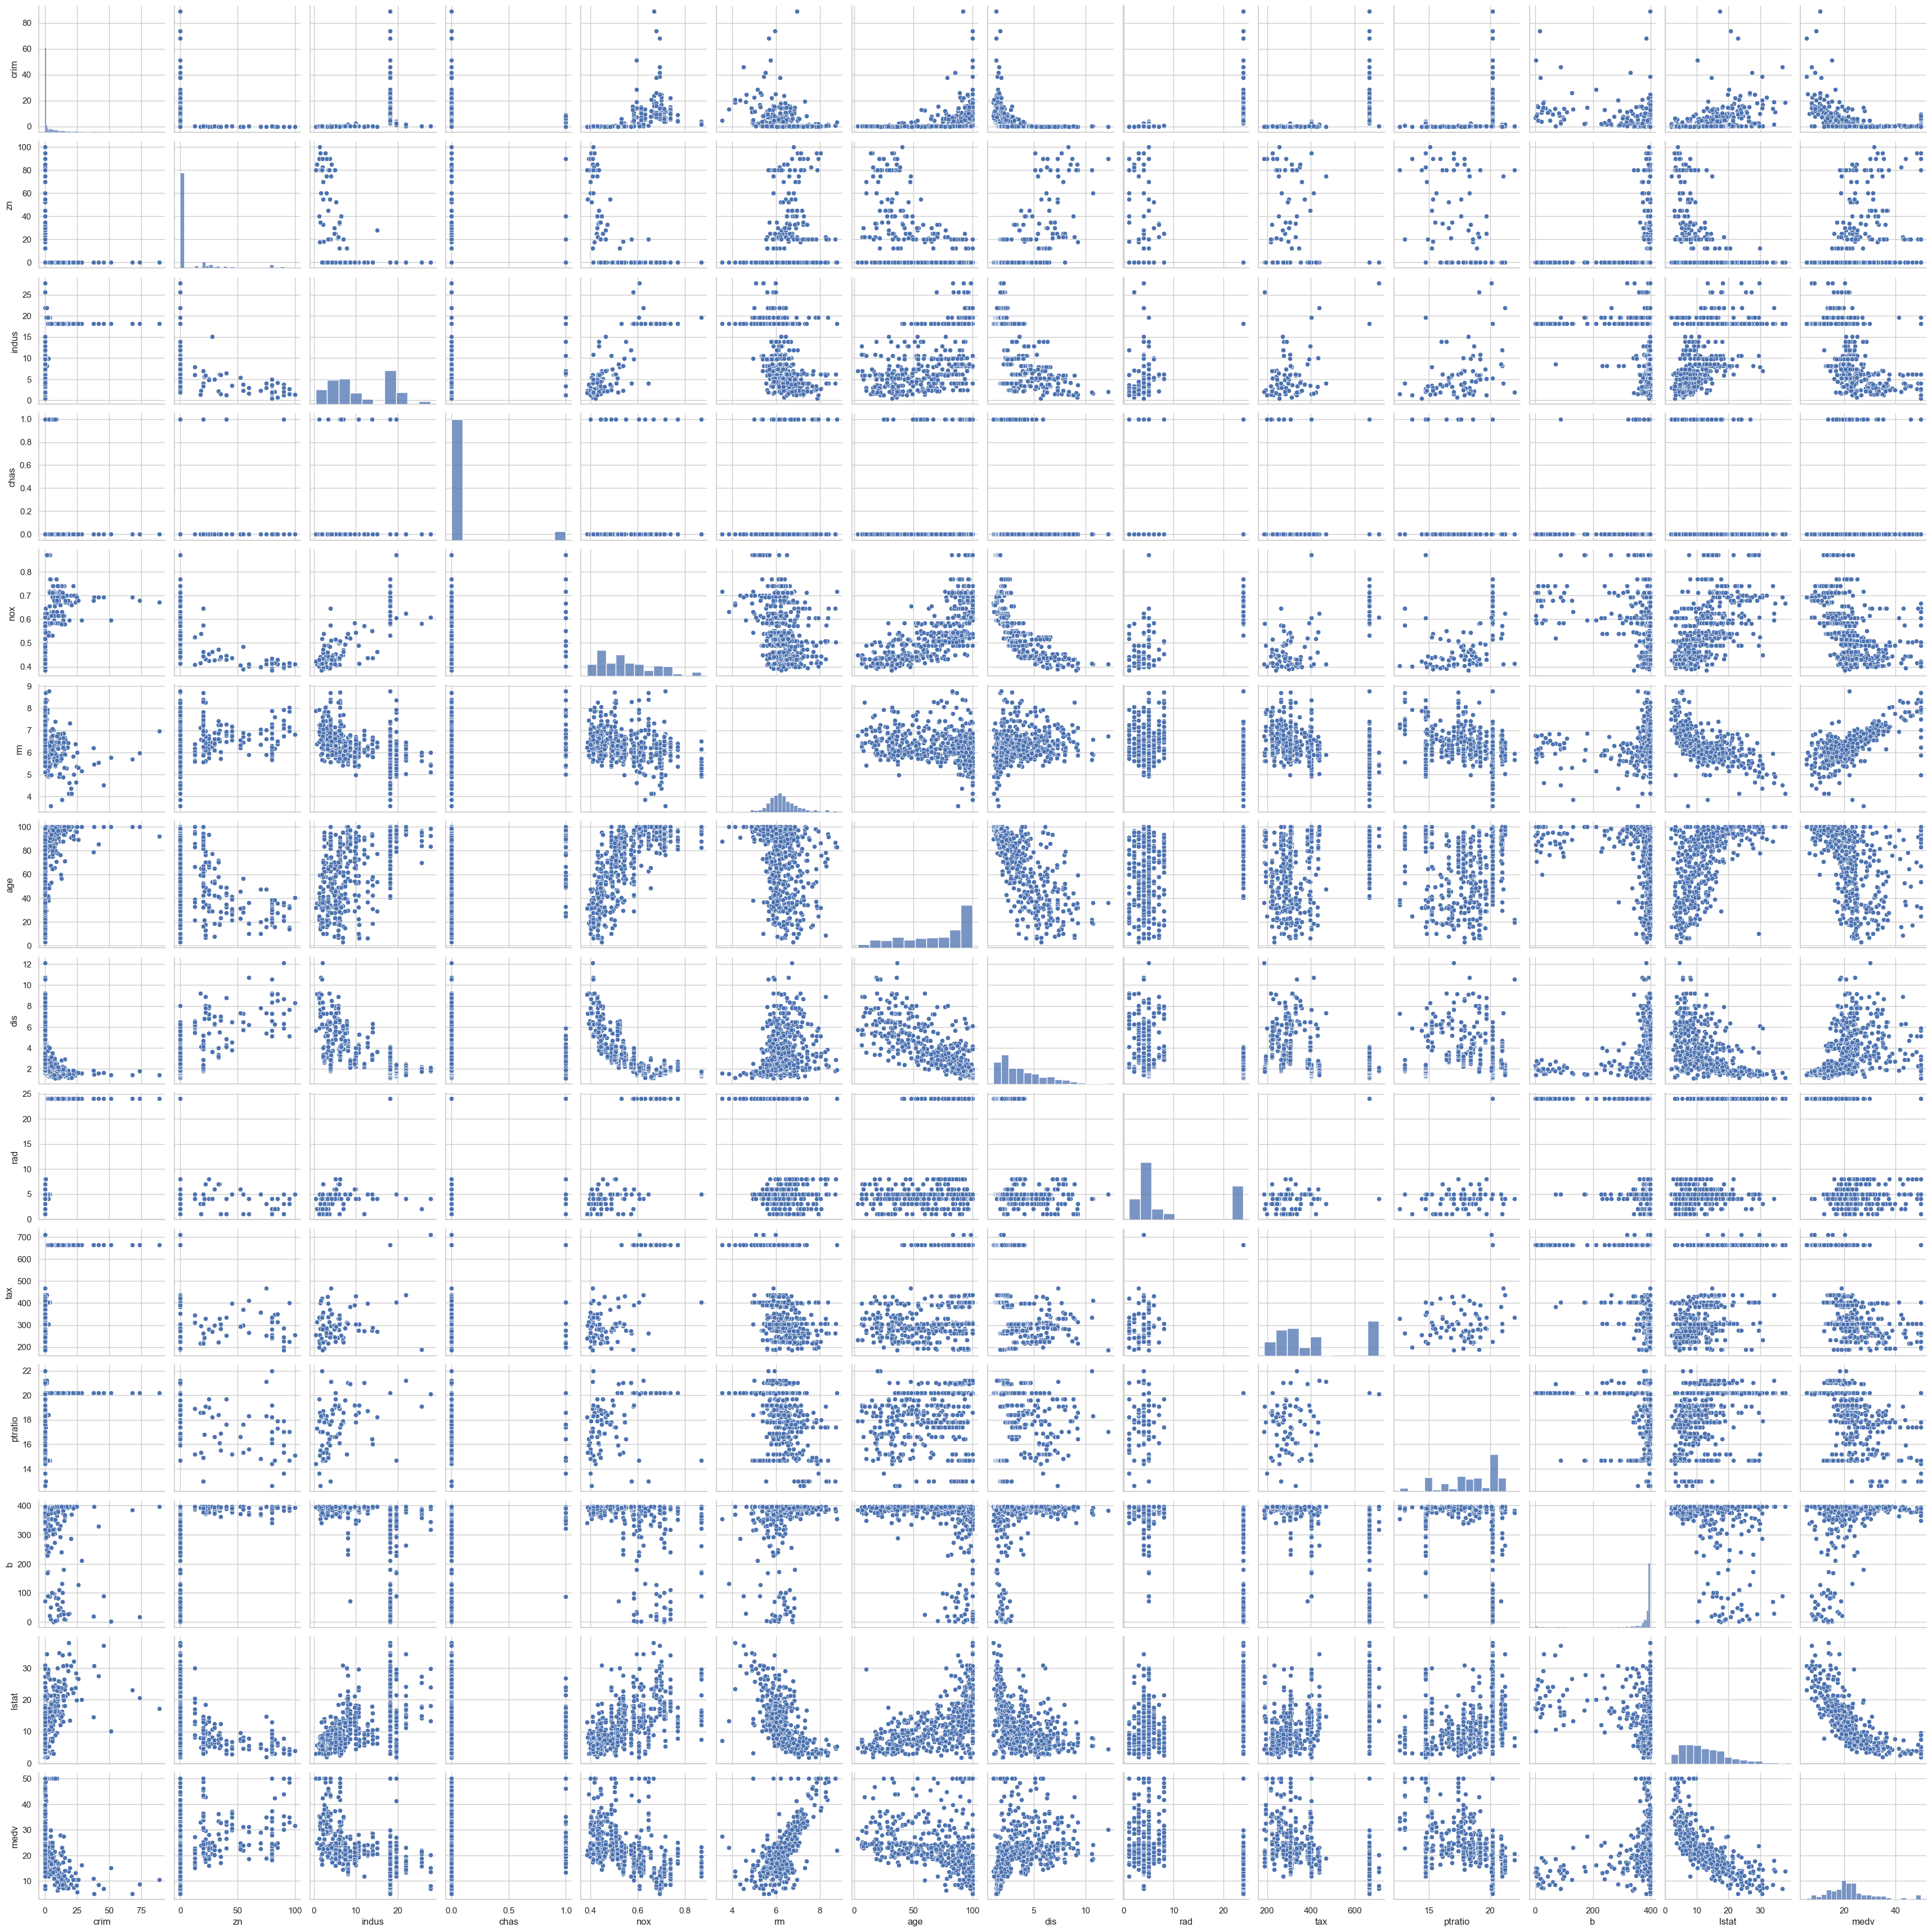

In [ ]:
sns.pairplot(dataset)

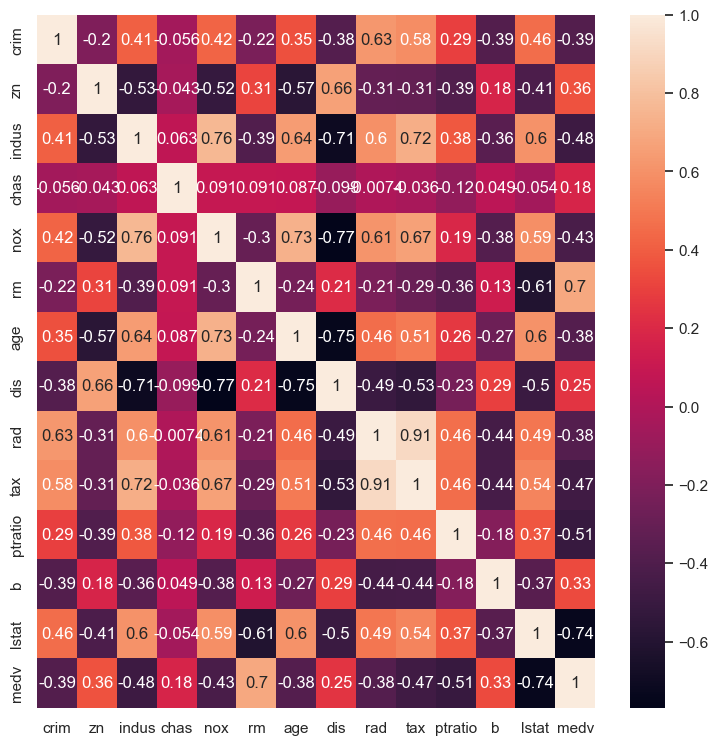

In [99]:
plt.figure(figsize=(9, 9))
sb.heatmap(dataset.corr(), annot=True)
plt.show()

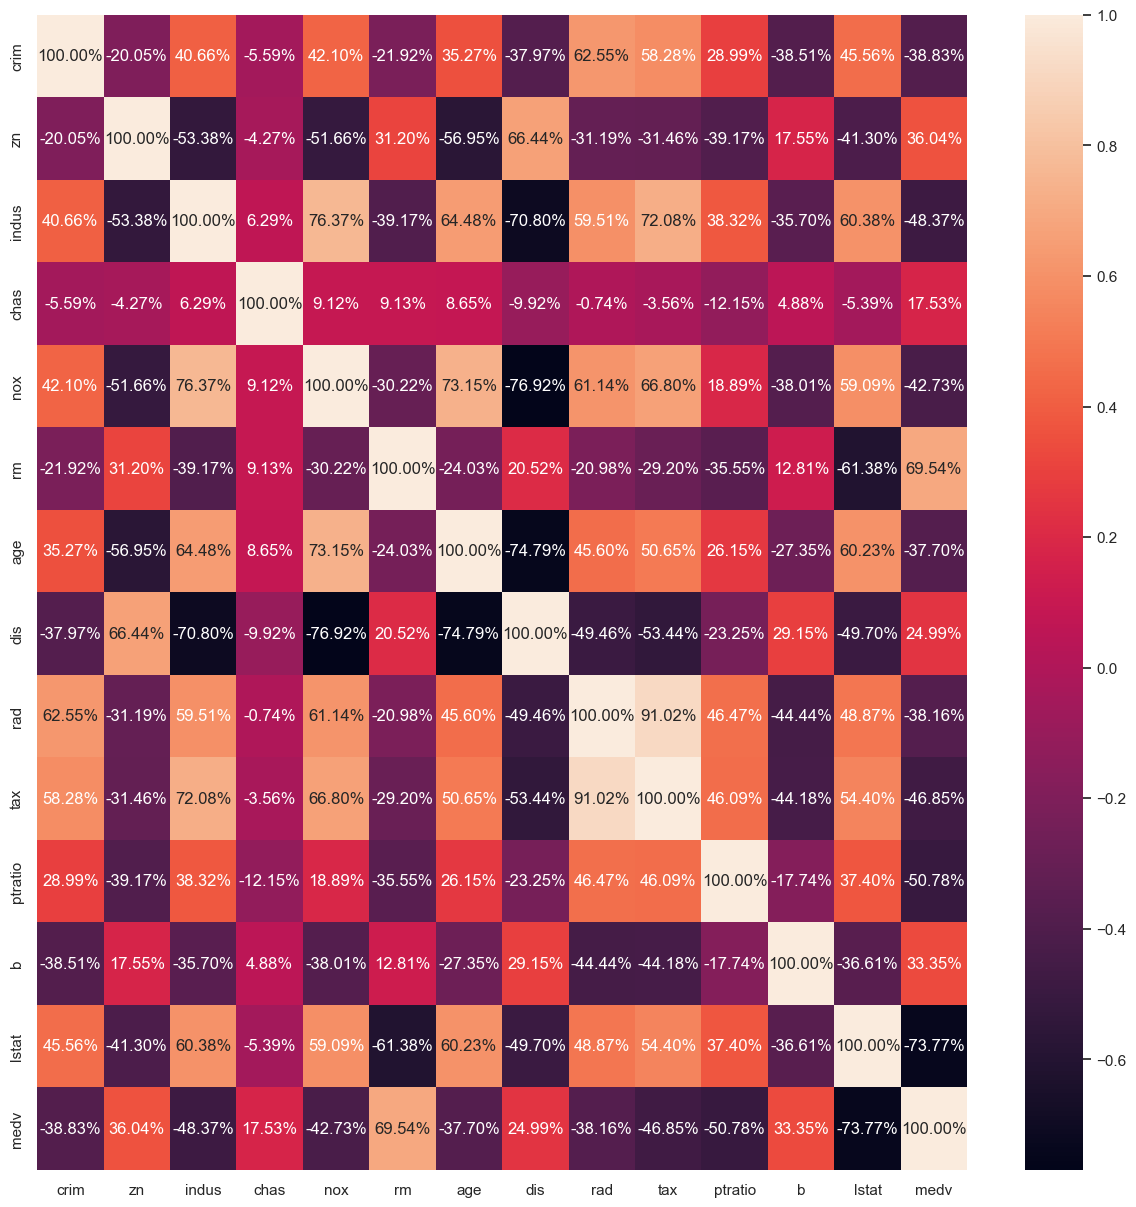

In [100]:
plt.figure(figsize=(15,15))
sb.heatmap(dataset.corr(), annot=True, fmt='.2%')
plt.show()

In [101]:
# To-Do : Visualize correlation of features
corr_medv = dataset.corrwith(dataset['medv'])
# prints correlation of one column with other columns
corr_medv

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
dtype: float64

In [102]:
corr_medv.abs().sort_values(ascending=False)
# sorting according to magnitudes

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
dtype: float64

In [103]:
dataset.corr()
# prints correlation of all columns with other columns

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### identify X  & Y

In [105]:
# independent vars
x = dataset.iloc[ : , :13].values
x[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [107]:
# dependent vars
y = dataset.iloc[ : , 13].values
y[:2]

array([24. , 21.6])

### Splitting

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Preprocessing

#### Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [112]:
x_train[:2]

array([[-0.37257438, -0.49960763, -0.70492455,  3.66450153, -0.42487874,
         0.93567804,  0.69366877, -0.4372179 , -0.16224243, -0.56165616,
        -0.48463784,  0.3716906 , -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, -0.27288841, -1.24185891,
        -0.49118121, -1.8355285 ,  0.73005474, -0.62464765, -0.57337637,
         0.33649132,  0.20501196, -0.38768057]])

In [113]:
x_test[:2]

array([[-4.36752612e-01, -4.39882694e-01, -1.26009787e+00,
        -2.71448357e-01, -7.59976330e-01,  1.59563423e-01,
        -1.75561320e+00,  6.00755701e-01, -6.91310354e-01,
         2.55645541e-03, -7.48346275e-01,  2.67413362e-01,
        -7.88042853e-01],
       [ 4.63542006e-01, -4.39882694e-01,  1.09537107e+00,
        -2.71448357e-01,  6.84309089e-01, -9.00880536e-04,
         1.17611331e+00, -1.23857700e+00,  1.56512664e+00,
         1.50350755e+00,  8.67390455e-01,  1.77343807e-01,
        -4.49823527e-01]])

### Linear Regression

#### Modeling: Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lm = LinearRegression()

#### Training: Linear Regression

In [116]:
lm.fit(x_train, y_train)

LinearRegression()

#### calculating Linear coefficients

In [117]:
lm_coeff = pd.Series(lm.coef_, index=dataset.columns[: 13])
# storing coeffients of Linear Regression model as a Pandas Series
lm_coeff

crim      -0.970820
zn         1.057149
indus      0.038311
chas       0.594506
nox       -1.855148
rm         2.573219
age       -0.087615
dis       -2.880943
rad        2.112245
tax       -1.875331
ptratio   -2.292767
b          0.718179
lstat     -3.592455
dtype: float64

#### visualizing: Linear coefficients

<Axes: >

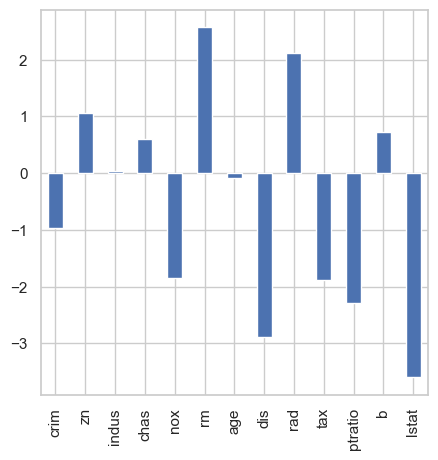

In [118]:
plt.figure(figsize=(5, 5))
lm_coeff.plot(kind='bar')
# plotting bar graph

<Axes: >

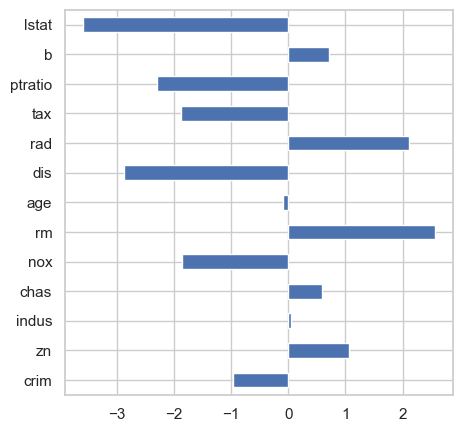

In [119]:
plt.figure(figsize=(5, 5))
lm_coeff.plot(kind='barh')
# plotting horizontal bar graph

### Ridge Regression

##### Modeling: Ridge Regression

In [120]:
from sklearn.linear_model import Ridge

In [121]:
rid = Ridge()

##### Training: Ridge Regression

In [122]:
rid.fit(x_train, y_train)

Ridge()

##### Calculating Coefficients: Ridge Regression

In [123]:
rd_coeff = pd.Series(rid.coef_, index=dataset.columns[: 13])
# storing coeffients of Linear Regression model as a Pandas Series
rd_coeff

crim      -0.962257
zn         1.040872
indus      0.011680
chas       0.598719
nox       -1.820134
rm         2.583786
age       -0.095188
dis       -2.848263
rad        2.036231
tax       -1.806092
ptratio   -2.283191
b          0.718310
lstat     -3.576073
dtype: float64

##### Visualizing Coefficients: Ridge Regression

<Axes: >

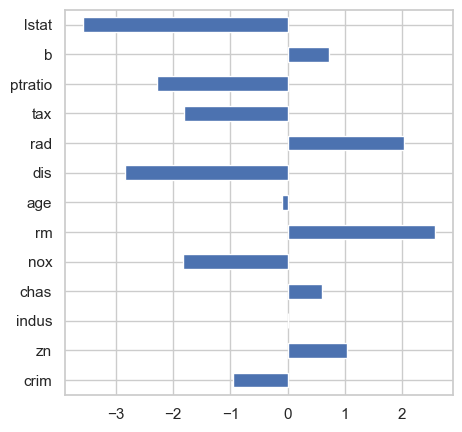

In [124]:
plt.figure(figsize=(5, 5))
rd_coeff.plot(kind='barh')
# plotting bar graph

### Lasso Regression

#### Modeling: Lasso Regression

In [125]:
from sklearn.linear_model import Lasso

In [126]:
la = Lasso()

#### Training: Lasso Regression

In [127]:
la.fit(x_train, y_train)

Lasso()

#### Calculating Coefficients: Lasso Regression

In [128]:
la_coeff = pd.Series(la.coef_, index=dataset.columns[: 13])
# storing coeffients of Linear Regression model as a Pandas Series
la_coeff

crim      -0.000000
zn         0.000000
indus     -0.000000
chas       0.000000
nox       -0.000000
rm         2.540098
age       -0.000000
dis       -0.000000
rad       -0.000000
tax       -0.171527
ptratio   -1.784796
b          0.110959
lstat     -3.585324
dtype: float64

#### Visualizing Coefficients: Lasso Regression

<Axes: >

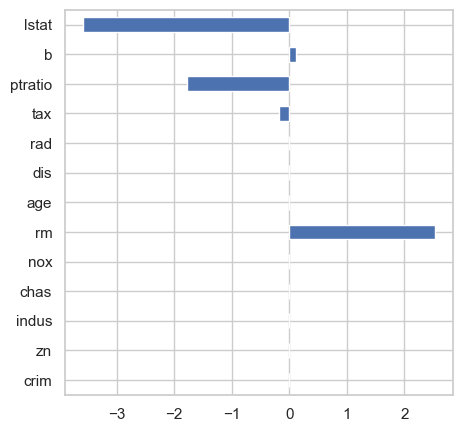

In [129]:
plt.figure(figsize=(5, 5))
la_coeff.plot(kind='barh')
# plotting bar graph

### ElasticNet Regression

#### Modeling: ElasticNet Regression

In [130]:
from sklearn.linear_model import ElasticNet

In [131]:
elnet = ElasticNet()

#### Training: ElasticNet Regression

In [132]:
elnet.fit(x_train, y_train)

ElasticNet()

#### Calculating Coeffiecients: ElasticNet Regression

In [133]:
elnet_coeff = pd.Series(la.coef_, index=dataset.columns[: 13])
# storing coeffients of Linear Regression model as a Pandas Series
elnet_coeff

crim      -0.000000
zn         0.000000
indus     -0.000000
chas       0.000000
nox       -0.000000
rm         2.540098
age       -0.000000
dis       -0.000000
rad       -0.000000
tax       -0.171527
ptratio   -1.784796
b          0.110959
lstat     -3.585324
dtype: float64

#### Visualizing Coefficients: ElasticNet Regression

<Axes: >

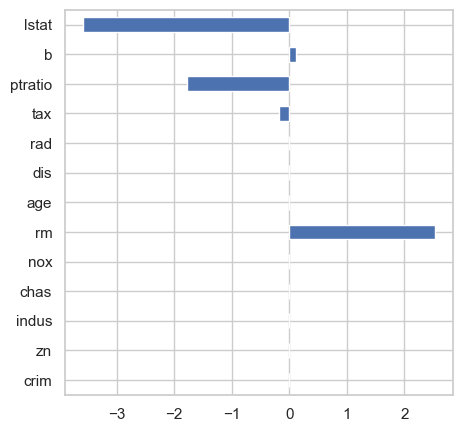

In [134]:
plt.figure(figsize=(5, 5))
elnet_coeff.plot(kind='barh')
# plotting bar graph

### Predictions

#### Prediction: Linear Regression

In [136]:
y_pred_lm = lm.predict(x_test)
y_pred_lm[:5]

array([25.87858248, 24.01180946, 30.22835216, 12.34741929, 21.99634736])

#### Prediction: Ridge Regression

In [137]:
y_pred_rid = rid.predict(x_test)
y_pred_rid[:5]

array([25.95510418, 23.95328489, 30.18542863, 12.34271115, 22.00978384])

#### Prediction: Lasso Regression

In [139]:
y_pred_la = la.predict(x_test)
y_pred_la[:5]

array([27.20745618, 22.43602729, 26.22245253, 13.77956784, 22.5613402 ])

#### Prediction: ElasticNet Regression

In [140]:
y_pred_elnet = elnet.predict(x_test)
y_pred_elnet[:5]

array([26.63669003, 20.77657954, 27.18734277, 13.83177378, 22.9013383 ])

### Accuracy

In [141]:
from sklearn import metrics

####  Accuracy: Linear Regression

##### mean_squared_error

In [146]:
mse_lm = metrics.mean_squared_error(y_test, y_pred_lm)
mse_lm
# Mean Square Error

35.11642077929317

##### r2_score / coefficient of determination

In [147]:
metrics.r2_score(y_test, y_pred_lm)
# model accuracy using R-Square
# (coefficient of determination) regression score function.

0.5687450086990026

In [148]:
lm.score(x_test, y_test)
# accuracy for test dataset using linear model
# Return the coefficient of determination of the prediction

0.5687450086990026

#### Accuracy: Ridge Regression

##### mean_squared_error

In [ ]:
mse_rid = metrics.mean_squared_error(y_test, y_pred_rid)
mse_rid
# Mean Square Error

35.18894572750182

##### r2_score / coefficient of determination

In [149]:
metrics.r2_score(y_test, y_pred_rid)
# model accuracy using R-Square
# (coefficient of determination) regression score function.

0.5678543499924846

In [150]:
rid.score(x_test, y_test)
# accuracy for test dataset
# Return the coefficient of determination of the prediction

0.5678543499924846

#### Accuracy: Lasso Regression

##### mean_squared_error

In [151]:
mse_la = metrics.mean_squared_error(y_test, y_pred_la)
mse_la
# Mean Square Error

40.62043710016924

##### r2_score / coefficient of determination

In [ ]:
metrics.r2_score(y_test, y_pred_la)
# model accuracy using R-Square
# (coefficient of determination) regression score function.

0.5011517159343937

In [ ]:
la.score(x_test, y_test)
# accuracy for test dataset
# Return the coefficient of determination of the prediction

0.5011517159343937

#### Accuracy: ElasicNet Regression

##### mean_squared_error

In [152]:
mse_elnet = metrics.mean_squared_error(y_test, y_pred_elnet)
mse_elnet
# Mean Square Error

43.25612264808443

##### r2_score / coefficient of determination

In [153]:
metrics.r2_score(y_test, y_pred_elnet)
# model accuracy using R-Square
# (coefficient of determination) regression score function.

0.46878359518592116

In [154]:
elnet.score(x_test, y_test)
# accuracy for test dataset
# Return the coefficient of determination of the prediction

0.46878359518592116

### Ridge Penalty ```α``` value setting

In [155]:
from sklearn.model_selection import GridSearchCV

In [157]:
parameter = {'alpha':[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 100]}

#### GridSearchCV

In [158]:
ridge_regressor = GridSearchCV(rid, parameter, cv=5)
# Exhaustive search over specified parameter values for an estimator
# GridSearchCV(estimator, param_grid, cv=None)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60,
                                   70, 80, 100]})

In [159]:
ridge_regressor.best_params_
# value of lambda
# Parameter setting that gave the best results on the hold out data.

{'alpha': 10}

In [160]:
ridge_regressor.best_score_
# if value of lambda is 10 then it gives best accuracy
# Mean cross-validated score of the best_estimator

0.7498253962279072

## Logistic Regression
- used to classify into two classes

### import libs

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset

In [20]:
# from google.colab import files
# uploaded = files.upload()
# D7data2.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [21]:
dataset = pd.read_csv('D7data2.csv')
dataset.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [22]:
dataset.shape

(32561, 15)

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE            32561 non-null  int64 
 1   WORKCLASS      32561 non-null  object
 2   FNLWGT         32561 non-null  int64 
 3   EDUCATION      32561 non-null  object
 4   EDUCATIONNUM   32561 non-null  int64 
 5   MARITALSTATUS  32561 non-null  object
 6   OCCUPATION     32561 non-null  object
 7   RELATIONSHIP   32561 non-null  object
 8   RACE           32561 non-null  object
 9   SEX            32561 non-null  object
 10  CAPITALGAIN    32561 non-null  int64 
 11  CAPITALLOSS    32561 non-null  int64 
 12  HOURSPERWEEK   32561 non-null  int64 
 13  NATIVECOUNTRY  32561 non-null  object
 14  ABOVE50K       32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [24]:
dataset.describe()

,AGE,FNLWGT,EDUCATIONNUM,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,ABOVE50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### EDA

#### EDUCATION column

In [25]:
dataset['EDUCATION'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [26]:
dataset['EDUCATION'].nunique()

16

[Text(0, 0, ' Bachelors'),
 Text(1, 0, ' HS-grad'),
 Text(2, 0, ' 11th'),
 Text(3, 0, ' Masters'),
 Text(4, 0, ' 9th'),
 Text(5, 0, ' Some-college'),
 Text(6, 0, ' Assoc-acdm'),
 Text(7, 0, ' Assoc-voc'),
 Text(8, 0, ' 7th-8th'),
 Text(9, 0, ' Doctorate'),
 Text(10, 0, ' Prof-school'),
 Text(11, 0, ' 5th-6th'),
 Text(12, 0, ' 10th'),
 Text(13, 0, ' 1st-4th'),
 Text(14, 0, ' Preschool'),
 Text(15, 0, ' 12th')]

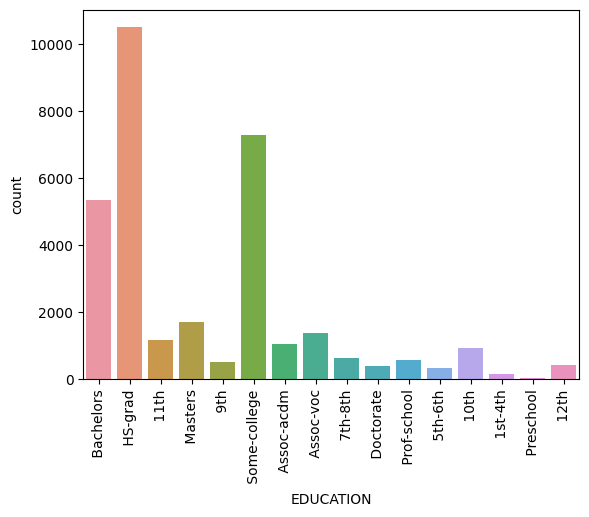

In [28]:
# plt.figure(figsize=(10, 10))
ax = sns.countplot(x=dataset['EDUCATION'], data=dataset, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### MARITALSTATUS column

In [29]:
dataset['MARITALSTATUS'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [30]:
dataset['MARITALSTATUS'].nunique()

7

[Text(0, 0, ' Never-married'),
 Text(1, 0, ' Married-civ-spouse'),
 Text(2, 0, ' Divorced'),
 Text(3, 0, ' Married-spouse-absent'),
 Text(4, 0, ' Separated'),
 Text(5, 0, ' Married-AF-spouse'),
 Text(6, 0, ' Widowed')]

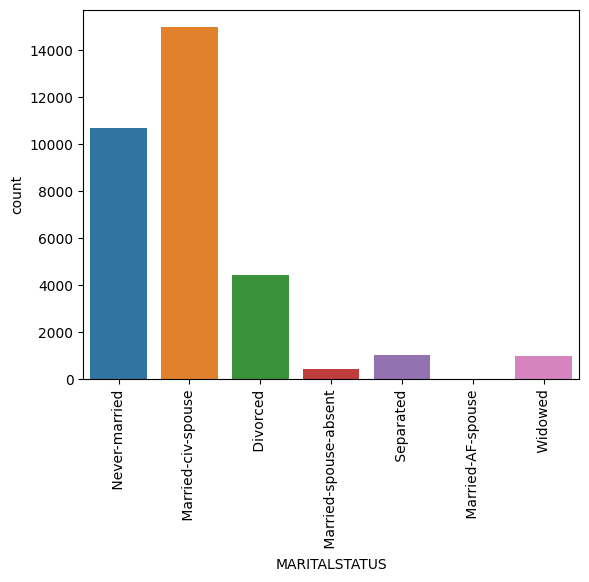

In [32]:
ax = sns.countplot(x=dataset['MARITALSTATUS'], data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### OCCUPATION column

In [33]:
dataset['OCCUPATION'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [34]:
dataset['OCCUPATION'].nunique()

15

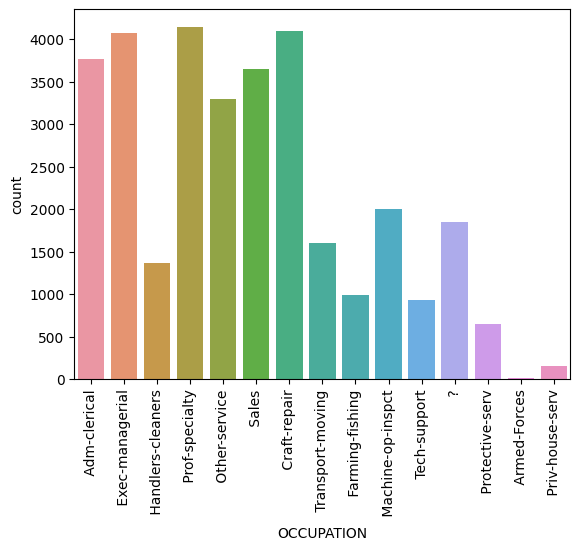

In [35]:
ax = sns.countplot(x=dataset['OCCUPATION'], data=dataset)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### gender column

In [36]:
dataset['SEX'].unique()

array([' Male', ' Female'], dtype=object)

In [37]:
dataset['SEX'].nunique()

2

<Axes: xlabel='SEX', ylabel='count'>

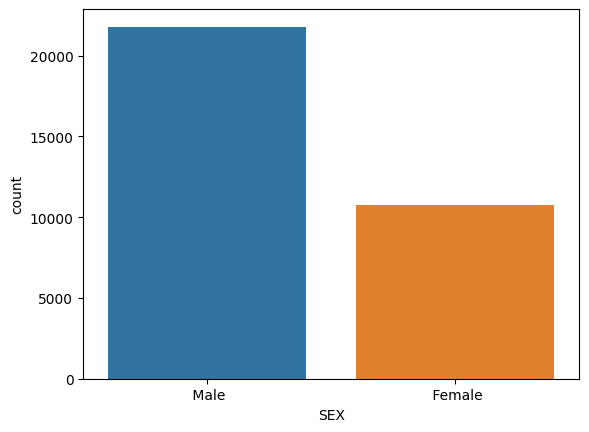

In [38]:
sns.countplot(x = dataset['SEX'], data=dataset)

#### RACE column

In [39]:
dataset['RACE'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [40]:
dataset['RACE'].nunique()

5

[Text(0, 0, ' White'),
 Text(1, 0, ' Black'),
 Text(2, 0, ' Asian-Pac-Islander'),
 Text(3, 0, ' Amer-Indian-Eskimo'),
 Text(4, 0, ' Other')]

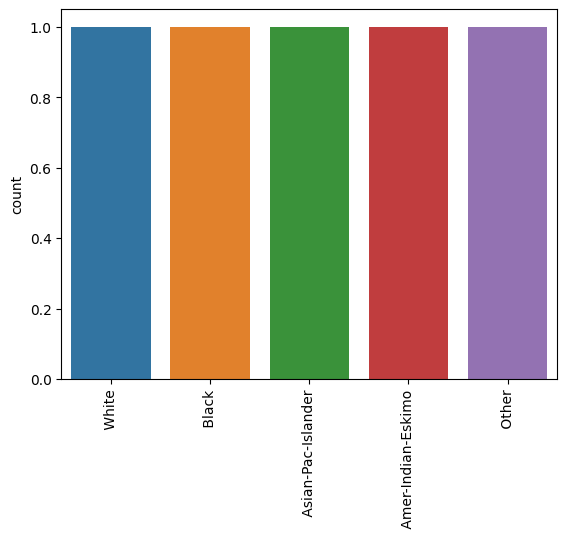

In [41]:
ax = sns.countplot(x = dataset['RACE'].unique(), data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### AGE column

In [42]:
dataset['AGE'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [43]:
dataset['AGE'].nunique()

73

<Axes: xlabel='AGE', ylabel='Count'>

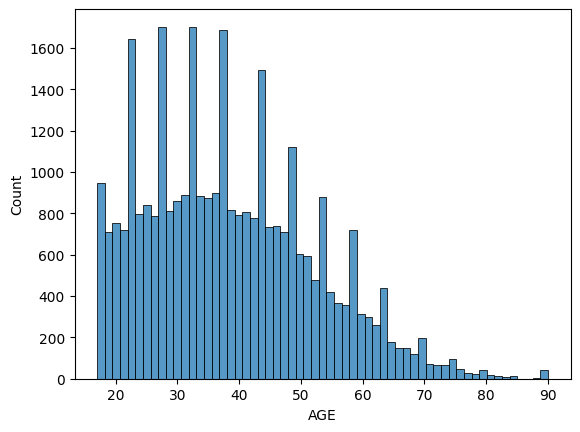

In [44]:
sns.histplot(x=dataset['AGE'], data=dataset)

<Axes: >

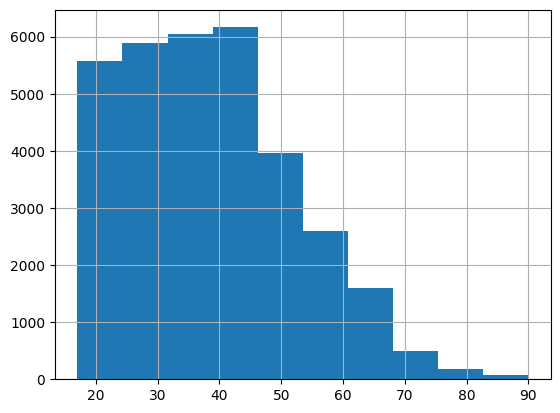

In [45]:
# alt for histogram using pandas DataFrame
dataset.iloc[:, 0].hist()

#### HOURSPERWEEK column

In [46]:
dataset['HOURSPERWEEK'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [47]:
dataset['HOURSPERWEEK'].nunique()

94

<Axes: xlabel='HOURSPERWEEK', ylabel='Count'>

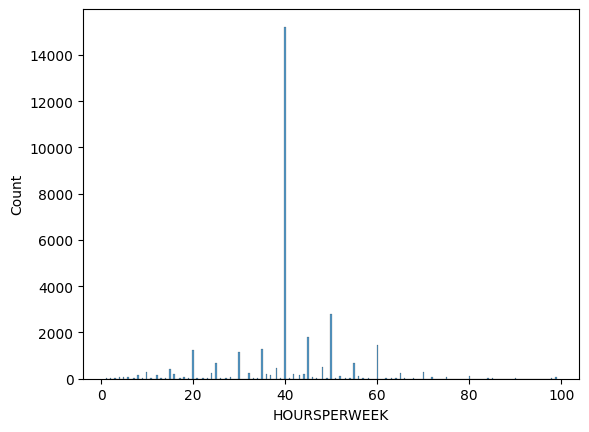

In [48]:
sns.histplot(x=dataset['HOURSPERWEEK'], data=dataset)

<Axes: >

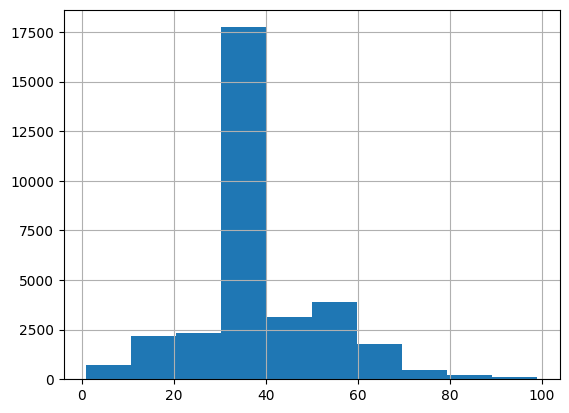

In [49]:
# alt for histogram using pandas DataFrame
dataset.iloc[:, 12].hist()

### Null check

In [50]:
dataset.isnull().sum()

AGE              0
WORKCLASS        0
FNLWGT           0
EDUCATION        0
EDUCATIONNUM     0
MARITALSTATUS    0
OCCUPATION       0
RELATIONSHIP     0
RACE             0
SEX              0
CAPITALGAIN      0
CAPITALLOSS      0
HOURSPERWEEK     0
NATIVECOUNTRY    0
ABOVE50K         0
dtype: int64

#### dropping unwanted

In [51]:
dataset.drop(['FNLWGT', 'EDUCATION', 'MARITALSTATUS', 'RELATIONSHIP', 'CAPITALGAIN', 'CAPITALLOSS', 'NATIVECOUNTRY'], axis=1, inplace=True)

In [52]:
dataset.head()

,AGE,WORKCLASS,EDUCATIONNUM,OCCUPATION,RACE,SEX,HOURSPERWEEK,ABOVE50K
0,39,State-gov,13,Adm-clerical,White,Male,40,0
1,50,Self-emp-not-inc,13,Exec-managerial,White,Male,13,0
2,38,Private,9,Handlers-cleaners,White,Male,40,0
3,53,Private,7,Handlers-cleaners,Black,Male,40,0
4,28,Private,13,Prof-specialty,Black,Female,40,0


In [53]:
dataset.shape

(32561, 8)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AGE           32561 non-null  int64 
 1   WORKCLASS     32561 non-null  object
 2   EDUCATIONNUM  32561 non-null  int64 
 3   OCCUPATION    32561 non-null  object
 4   RACE          32561 non-null  object
 5   SEX           32561 non-null  object
 6   HOURSPERWEEK  32561 non-null  int64 
 7   ABOVE50K      32561 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


### identify X & Y

In [56]:
# independent variables
x = dataset.iloc[ : , 6].values
x[:5]

array([40, 13, 40, 40, 40], dtype=int64)

In [57]:
# dependent variables
y = dataset.iloc[ : , 7].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Splitting

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [60]:
x_train[:5]

array([40, 54, 50, 40, 40], dtype=int64)

In [61]:
x_test[:5]

array([44, 40, 40, 40, 76], dtype=int64)

In [62]:
y_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [63]:
y_test[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### Preprocessing

#### reshaping
- need to reshape X as it is just single column, so need to reshape from horizontal shape to vertical shape

In [69]:
x_train = x_train.reshape(-1, 1)
x_train[:5]

array([[40],
       [54],
       [50],
       [40],
       [40]], dtype=int64)

In [70]:
x_test = x_test.reshape(-1, 1)
x_test[:5]

array([[44],
       [40],
       [40],
       [40],
       [76]], dtype=int64)

### Modeling

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()

### Training

In [73]:
model.fit(x_train, y_train)

LogisticRegression()

### Predict

In [76]:
lr_model_pred = model.predict(x_test)
lr_model_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### Evaluation

#### accuracy_score

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test, lr_model_pred)

0.7466605251036389

#### precision_score

In [80]:
from sklearn.metrics import precision_score

In [81]:
precision_score(y_test, lr_model_pred)

0.35135135135135137

#### recall_score

In [82]:
from sklearn.metrics import recall_score

In [83]:
recall_score(y_test, lr_model_pred)

0.04075235109717868

#### f1_score

In [84]:
from sklearn.metrics import f1_score

In [85]:
f1_score(y_test, lr_model_pred)

0.07303370786516854

#### classification_report

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test, lr_model_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      4918
           1       0.35      0.04      0.07      1595

    accuracy                           0.75      6513
   macro avg       0.55      0.51      0.46      6513
weighted avg       0.66      0.75      0.66      6513



### Visualize classification

#### scatter()
- for classification

Text(0, 0.5, 'ABOVE50K')

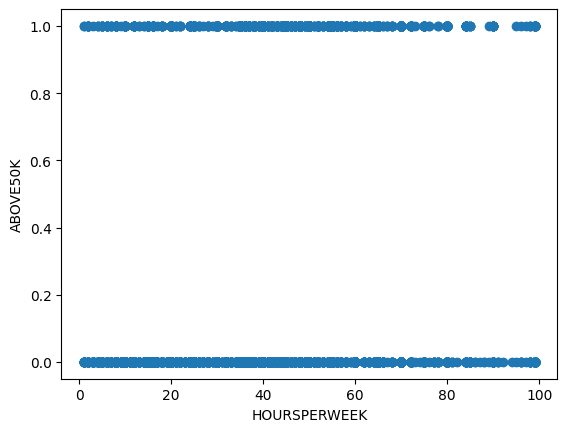

In [88]:
plt.scatter(dataset['HOURSPERWEEK'], dataset['ABOVE50K'])
plt.xlabel('HOURSPERWEEK')
plt.ylabel('ABOVE50K')
# shows data point classified as 0 or 1

#### regplot()
- Regression Line Plot

<Axes: xlabel='HOURSPERWEEK', ylabel='ABOVE50K'>

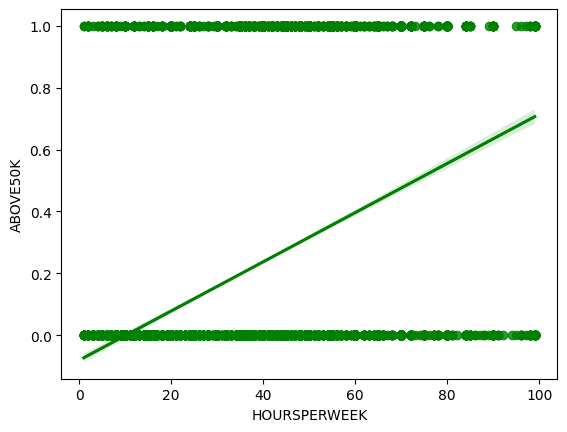

In [89]:
sns.regplot(x='HOURSPERWEEK', y='ABOVE50K', color='g', data=dataset)
# shows regression is converte into classification

# HW:
- AGE vs ABOVE50K logistic regression